In [271]:
#imports
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
#copie du lien permettant de faire une requête à l'api
link = "https://data.nantesmetropole.fr/api/explore/v2.1/catalog/datasets/244400404_stations-velos-libre-service-nantes-metropole-disponibilites/records?limit=20&offset=0"

In [273]:
#requête à l'api
r = requests.get(link)

In [274]:
#enregistrement du résultat dans un dictionnaire
bikes_dict = r.json()

In [275]:
#affichage du dictionnaire
pprint(bikes_dict)

{'results': [{'address': '4, rue des Carmélites - Place Tirant Lo Blanc',
              'available_bike_stands': 14,
              'available_bikes': 1,
              'banking': 'False',
              'bike_stands': 15,
              'bonus': 'False',
              'contract_name': 'nantes',
              'last_update': '2024-12-12T11:03:58+00:00',
              'name': '003-STRASBOURG',
              'number': 3,
              'position': {'lat': 47.21682, 'lon': -1.551979},
              'status': 'OPEN'},
             {'address': '2 bis, boulevard Léon Bureau',
              'available_bike_stands': 10,
              'available_bikes': 26,
              'banking': 'True',
              'bike_stands': 36,
              'bonus': 'False',
              'contract_name': 'nantes',
              'last_update': '2024-12-12T11:04:59+00:00',
              'name': "043-MACHINE DE L'ÎLE",
              'number': 43,
              'position': {'lat': 47.206727, 'lon': -1.565034},
              

In [276]:
#enregistrement d'une liste contenant le nom des colonnes que je vais garder
cols = ['address', 'available_bikes', 'bike_stands', 'position.lon', 'position.lat']

In [277]:
#enregistrement des colonnes que je vais utiliser dans un dataframe
df_bikes = pd.json_normalize(bikes_dict, record_path = 'results')[cols]

In [278]:
#ajout d'une colonne 'taux_remplissage' qui calcule le nombre de vélos dispos divisé par le nombre d'emplacements dispos dans la station
df_bikes['taux_remplissage'] = df_bikes.available_bikes / df_bikes.bike_stands

In [279]:
#affichage des adresses de stations et de leur taux de remplissage
display(df_bikes[['address', 'taux_remplissage']])

,address,taux_remplissage
0,"4, rue des Carmélites - Place Tirant Lo Blanc",0.066667
1,"2 bis, boulevard Léon Bureau",0.722222
2,Rue de la Loire - place Gaston Defferre,0.318182
3,"5, boulevard de Berlin",0.600000
4,"15, rue de Verdun",0.000000
5,Place Foch,0.000000
6,"18, rue Talensac - 26, rue de Bel Air",0.071429
7,Rue de Berry - Rue des Hauts Pavés,0.375000
8,Angle rue du Calvaire / Rue Guépin,0.000000
9,"3, rue Pierre Chereau",0.450000


In [280]:
#suppression des lignes vides
df_bikes.taux_remplissage.dropna()

0     0.066667
1     0.722222
2     0.318182
3     0.600000
4     0.000000
5     0.000000
6     0.071429
7     0.375000
8     0.000000
9     0.450000
10    0.400000
11    0.687500
12    0.800000
13    0.800000
14    0.266667
15    0.400000
16    0.650000
17    0.125000
18    0.357143
19    0.777778
Name: taux_remplissage, dtype: float64

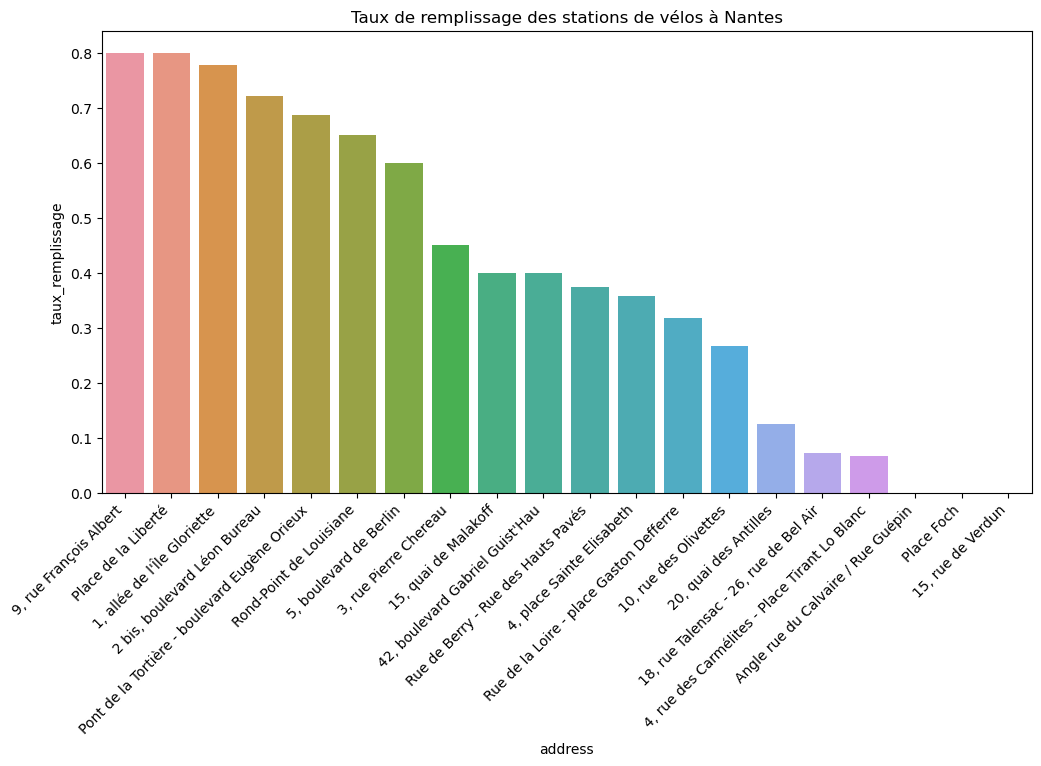

In [281]:
#affichage des taux de remplissage dans un graphique
df_bikes_sorted = df_bikes.sort_values(by='taux_remplissage', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bikes_sorted, x='address', y='taux_remplissage')
plt.xticks(rotation=45, ha='right')
plt.title("Taux de remplissage des stations de vélos à Nantes")
plt.show()

In [282]:
df_bikes = df_bikes.query('available_bikes > 0')

In [283]:
df_bikes

,address,available_bikes,bike_stands,position.lon,position.lat,taux_remplissage
0,"4, rue des Carmélites - Place Tirant Lo Blanc",1,15,-1.551979,47.216820,0.066667
1,"2 bis, boulevard Léon Bureau",26,36,-1.565034,47.206727,0.722222
2,Rue de la Loire - place Gaston Defferre,7,22,-1.525933,47.210742,0.318182
3,"5, boulevard de Berlin",12,20,-1.529736,47.214195,0.600000
6,"18, rue Talensac - 26, rue de Bel Air",1,14,-1.558941,47.221854,0.071429
7,Rue de Berry - Rue des Hauts Pavés,6,16,-1.567502,47.225471,0.375000
9,"3, rue Pierre Chereau",9,20,-1.559161,47.216788,0.450000
10,"42, boulevard Gabriel Guist'Hau",6,15,-1.569172,47.217930,0.400000
11,Pont de la Tortière - boulevard Eugène Orieux,11,16,-1.549222,47.235335,0.687500
12,Place de la Liberté,12,15,-1.587850,47.206560,0.800000


In [284]:
df_bikes['coordinates'] = df_bikes.apply(lambda row: [row['position.lat'], row['position.lon']], axis=1)

In [285]:
import folium

In [286]:
optimal_latitude = df_bikes['position.lat'].mean()
optimal_longitude = df_bikes['position.lon'].mean()

# Affichage de la position optimale
optimal_position = (optimal_latitude, optimal_longitude)

In [288]:
m = folium.Map(location=optimal_position, zoom_start=13)

for indice, row in df_bikes.iterrows():
    folium.CircleMarker(
        location=row["coordinates"],
        radius=10,
        color='black',
        fill=True,
        fill_color='red' if row['taux_remplissage'] < 0.33 else 
                   'orange' if row['taux_remplissage'] < 0.66 else 'green',
        fill_opacity=0.9,
        popup=f'Taux de remplissage : {int(row["taux_remplissage"] * 100)}%'
    ).add_to(m)

m